In [28]:
from hazm import *
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving dataset.xlsx - Sheet1.csv to dataset.xlsx - Sheet1 (2).csv


In [4]:
import pandas as pd
#stopfile = pd.read_csv('stopwords-fa.csv', index_col=None, header=None, encoding="utf-8")
df = pd.read_csv('dataset.xlsx - Sheet1.csv', index_col=None, header=None,skiprows=1, encoding="utf-8")

In [5]:
df

,0,1
0,نهایتا، یک دوربین VGA نیز برای انجام مکالمات ...,0
1,حتي فرکانس پردازندشم تا 1800 GHz واسه هر هسته ...,0
2,اما با اینکه شکل کلی iOS تغییری نداشته است، ول...,1
3,به عنوان مثال اگر نیاز به دستگاه های پرینتر، ...,0
4,تصاویر گرفته شده با دوربین 8 مگا پیکسلی این گو...,1
...,...,...
11995,در کل، با اینکه عکاسی با تبلت را همواره جزو مو...,2
11996,يا علي.,0
11997,من يک ماهه که دارم ازش استفاده مي کنم و راضيم.,1
11998,من 6 ماهه که اين دوربين رو دارم فوق العادست و ...,2


In [6]:
print(df.shape)
print(df.isna().sum())
df = df.dropna()
df = df.drop_duplicates(subset=[0], keep='first')
df.shape

(12000, 2)
0    0
1    0
dtype: int64


(10735, 2)

In [7]:
x_df = df[0]
y_df = df[1]

In [109]:
print('Number of testing sentence: ', x_df.shape)
print('Number of testing label: ', y_df.shape)
df.shape

Number of testing sentence:  (10735,)
Number of testing label:  (10735,)


(10735, 2)

In [110]:
from sklearn.model_selection import train_test_split
X_train , X_val , y_train , y_val = train_test_split(x_df, y_df, test_size = 0.2)

print('Train data Shape : ',X_train.shape)
print('Train target shape :',y_train.shape)
print('valid data shape :',X_val.shape)
print('valid target shape : ',y_val.shape)

Train data Shape :  (8588,)
Train target shape : (8588,)
valid data shape : (2147,)
valid target shape :  (2147,)


In [111]:
X_train[1]

'حتي فرکانس پردازندشم تا 1800 GHz واسه هر هسته جا داره که من رو 1500 GHz گذاشتم.'

In [125]:
train, test = train_test_split(df, test_size=0.2)

In [126]:
#some shit with labels

from sklearn.preprocessing import LabelEncoder

train_labels = train[1]
test_labels = test[1]

le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)
print(le.classes_)

[-2 -1  0  1  2]


In [127]:
from tensorflow.keras.utils import to_categorical
import numpy as np 

#change data types (actualy idk why)
labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))
labels_train[11]

array([0., 0., 0., 0., 1.], dtype=float32)

In [133]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Define the sequence lengths, max number of words and embedding dimensions
MAX_SEQUENCE_LENGTH = 300 #can plot a graph for length
MAX_NB_WORDS = 15000
EMBEDDING_DIM = 100

# Get the frequently occurring words
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train[0])
train_sequences = tokenizer.texts_to_sequences(train[0])
test_sequences = tokenizer.texts_to_sequences(test[0])


word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print(train_sequences)

#some padding shit
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
print(train_data)

Found 13578 unique tokens.
[[256, 521, 487, 25, 23, 653, 2, 107, 7016, 9], [16, 35, 4056, 5022, 3434, 1, 5023, 10, 1434, 5, 24, 4057, 1, 62, 35, 3435, 1, 4058, 10, 5, 7017, 125, 49, 2102], [1558, 105, 5, 495, 217, 57, 4, 2479, 760, 2480, 384, 4059, 28, 610, 9], [6, 7, 68, 67, 7, 4060, 207, 191], [446, 20, 47, 8, 16, 565, 173, 276, 1386, 97, 2481, 3436, 5024, 5025, 5026, 3437, 3438, 2998, 5027, 5028, 10, 2, 43, 1325, 9], [106, 173, 276, 8, 16, 472, 7018, 2271, 723, 9, 59, 2709, 4, 909, 791, 20, 47, 15, 313], [5, 1151, 5, 513, 597, 1977, 1, 5, 582, 244, 1498, 1000, 23, 30, 43, 6, 2103, 217, 1641, 1035, 227], [115, 118, 1559, 423, 1111, 883, 1978, 1, 1499, 447, 740, 370, 263, 2482, 11, 1642, 84, 7, 60, 19, 1001, 448, 385, 134, 53, 1387, 40, 583, 286, 3439], [2, 61, 85, 884, 3, 522, 2104, 885, 9, 99, 7019, 5029, 91, 1071, 1643, 3, 5, 513, 7020, 5030, 30, 7021, 1152, 577, 128, 148], [17, 1002, 63, 2105, 3, 60, 19, 242, 112, 361, 1, 477, 48, 12, 45, 7022, 1036, 48, 431, 140, 7, 2272, 33, 126

In [135]:
from keras.layers import   Dense, Input, LSTM, Embedding, Dropout, Activation, BatchNormalization, Flatten
import tensorflow as tf
from tensorflow import keras
model2 = keras.Sequential()

#Embedding: batch_size*input_length --> batch_dimension(none)*input_length*output_dim(embbeding_dim)
model2.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model2.add(LSTM(units=40, activation='relu', recurrent_activation='hard_sigmoid',return_sequences=True))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(5,activation='softmax'))

model2.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
model2.fit(train_data, labels_train, batch_size=40, epochs=20, validation_data=(test_data, labels_test))

Epoch 1/20
215/215 [==============================] - 63s 280ms/step - loss: 1.1977 - accuracy: 0.4871 - val_loss: 1.2871 - val_accuracy: 0.3954
Epoch 2/20
215/215 [==============================] - 59s 274ms/step - loss: 0.7456 - accuracy: 0.7175 - val_loss: 1.1377 - val_accuracy: 0.4793
Epoch 3/20
215/215 [==============================] - 59s 272ms/step - loss: 0.4010 - accuracy: 0.8612 - val_loss: 1.1121 - val_accuracy: 0.5752
Epoch 4/20
215/215 [==============================] - 59s 276ms/step - loss: 0.2386 - accuracy: 0.9263 - val_loss: 1.5202 - val_accuracy: 0.5575
Epoch 5/20
215/215 [==============================] - 59s 273ms/step - loss: 0.1606 - accuracy: 0.9534 - val_loss: 1.8208 - val_accuracy: 0.5817
Epoch 6/20
215/215 [==============================] - 59s 273ms/step - loss: 0.1216 - accuracy: 0.9666 - val_loss: 2.0306 - val_accuracy: 0.5617
Epoch 7/20
215/215 [==============================] - 58s 270ms/step - loss: 0.1049 - accuracy: 0.9721 - val_loss: 2.1791 - val_ac

**Preprocessing on Text**

In [8]:
normalizer = Normalizer()

In [9]:
x_df = x_df.apply(normalizer.normalize)
x_df

0        نهایتا، یک دوربین VGA نیز برای انجام مکالمات ت...
1        حتی فرکانس پردازندشم تا ۱۸۰۰ GHz واسه هر هسته ...
2        اما با اینکه شکل کلی iOS تغییری نداشته است، ول...
3        به عنوان مثال اگر نیاز به دستگاه‌های پرینتر، ا...
4        تصاویر گرفته شده با دوربین ۸ مگا پیکسلی این گو...
                               ...                        
11995    در کل، با اینکه عکاسی با تبلت را همواره جزو مو...
11996                                              یا علی.
11997       من یک ماهه که دارم ازش استفاده می‌کنم و راضیم.
11998    من ۶ ماهه که این دوربین رو دارم فوق العادست و ...
11999    همچنین Galaxy S III قابلیت فیلم‌برداری Full HD...
Name: 0, Length: 10735, dtype: object

In [10]:
#import urllib.request
import requests
#normalize the text
normalizer = Normalizer()

def normal(text):
    text=str(text)
    text = normalizer.character_refinement(text)
    text = normalizer.punctuation_spacing(text)
    text = normalizer.affix_spacing(text)
    text = normalizer.normalize(text)
    return text

#find stopwords in stopwords file
stopwords = []

stopfile = requests.get("https://github.com/stopwords-iso/stopwords-fa/blob/master/stopwords-fa.txt")
data = stopfile.text
[stopwords.append(x) for x in data]
stopwords = set(stopwords)
len(stopwords)


def remove_stopwords(text):
    text=str(text)
    filtered_tokens = [token for token in text.split() if token not in stopwords]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

def remove_emoji(text): 
    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u200c"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', text)

def remove_halfspace(text): 
    emoji_pattern = re.compile("["        
                u"\u200c"              
    "]+", flags=re.UNICODE)    
    return emoji_pattern.sub(r' ', text) 

def remove_link(text): 
    return re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', str(text))
    # return re.sub(r"\bhttps?://\S+", "", str(text))

def remove_picUrl(text):
    return re.sub(r'pic.twitter.com/[\w]*',"", str(text))

def remove_rt(text):
    z = lambda text: re.compile('\#').sub('', re.compile('RT @').sub('@', str(text), count=1).strip())
    return z(text)

def remove_hashtag(text):
    return re.sub(r"#[^\s]+", '', str(text))

def remove_mention(text):
    return re.sub(r"@[^\s]+", '', str(text))

def remove_email(text): 
    return re.sub(r'\S+@\S+', '', str(text))

def remove_numbers(text): 
    return re.sub(r'^\d+\s|\s\d+\s|\s\d+$', ' ', str(text))

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', str(text))

def remove_quote(text): 
    return  str(text).replace("'","")

def remove_chars(text): 
    # return re.sub(r'\.(?!\d)', '', str(text))
    return  re.sub(r'[$+&+;+]|[><!+،:’,\(\).+]|[-+]|[…]|[\[\]»«//]|[\\]|[#+]|[_+]|[—+]|[*+]|[؟+]|[?+]|[""]', ' ', str(text))

def remove_englishword(text): 
    return re.sub(r'[A-Za-z]+', '', str(text))

def remove_extraspaces(text):
    return re.sub(r' +', ' ', text)

def remove_extranewlines(text):
    return re.sub(r'\n\n+', '\n\n', text)

#lemmatize the text
lemmatizer = Lemmatizer()

def lemma(text):
    text=str(text)
    return lemmatizer.lemmatize(text)

def preprocess2(text):
    text = remove_link(text)
    text = remove_picUrl(text)
    text = remove_englishword(text)
    text = normal(text)
    text = remove_stopwords(text)
    text = remove_emoji(text)
    text = remove_rt(text)
    text = remove_mention(text)
    text = remove_emoji(text)
    text = remove_hashtag(text)   
    text = remove_email(text) 
    text = remove_html(text) 
    text = remove_chars(text)
    text = remove_numbers(text)
    text = remove_quote(text)
    text = lemma(text)
    text = remove_extraspaces(text)
    text = remove_extranewlines(text)
    text = remove_halfspace(text) 
    text = remove_stopwords(text)
    return text

In [11]:
df1_cleaned = list(map(preprocess2, x_df))

In [12]:
df1_cleaned[0:30]

['نهایتا یک دوربین نیز برای انجام مکالمات تصویری در قسمت جلویی گوشی تعبیه گردیده است',
 'حتی فرکانس پردازندشم تا واسه هر هسته جا داره که من رو گذاشتم',
 'اما با اینکه شکل کلی تغییری نداشته است ولی به گفته کمپانی اپل هیچ برنامه ای نیست که در نسخه جدید بهتر نشده باشد',
 'به عنوان مثال اگر نیاز به دستگاه های پرینتر اسکنر فکس کپی داشته باشید مجبورید که هر چهار دستگاه را جداگانه تهیه کنید',
 'تصاویر گرفته شده با دوربین مگا پیکسلی این گوشی که به سنسور نیز مجهز است از کیفیت نسبتا خوبی برخوردارند',
 'هرچند که هم می تواند کامل تر از این باشد ولی تا حدودی کار کردن با آن از چیزی که بر روی سیستم عامل می بینیم راحت تر است',
 'زوم کامل اپتیکال در هنگام فیلم برداری مقدور می باشد',
 'چه بهتر که ما کارایی را به پرستیژ نفروشیم',
 'نه دوربین های رقیب',
 'از دوربینم راضیم در خریدش شک نکنید',
 'فیلم برداری نیز شرایط یکسانی دارد بسیار خوب است',
 'باز هم طبق روال این دوربین دارای همه مودهای عکاسی از مود کاملا اتوماتیک خودکار هوشمند گرفته تا مودهای دستی را دارا می باشد',
 'اگه کمی هم جستجو بکنید میتونید هدست 

In [13]:
df1 = df.assign(cleaned_comment = df1_cleaned)

In [14]:
#Get Most Frequent Words in a tuple format ('count','word')
from collections import Counter
freq_words = Counter(" ".join(df1["cleaned_comment"]).split()).most_common(100)

In [15]:
# Get a word from the tuple
n = 0 # N. . .
terms = [x[n] for x in freq_words]

In [16]:
str(terms)

"['به', 'که', 'این', 'از', 'در', 'با', 'می', 'گوشی', 'های', 'است', 'را', 'دوربین', 'هم', 'آن', 'من', 'رو', 'یک', 'برای', 'خیلی', 'ها', 'کیفیت', 'بسیار', 'صفحه', 'ولی', 'تا', 'نیز', 'نظر', 'شده', 'بر', 'تبلت', 'روی', 'داره', 'باشد', 'استفاده', 'نمایش', 'دارد', 'ای', 'اما', 'کار', 'هست', 'واقعا', 'یا', 'تر', 'عکس', 'نیست', 'خوب', 'قرار', 'مدل', 'یه', 'خود', 'نسبت', 'قیمت', 'کنید', 'شما', 'میشه', 'وجود', 'خوبی', 'فیلم', 'کند', 'باید', 'هر', 'دو', 'بود', 'البته', 'شود', 'فقط', 'تو', 'عالی', 'سرعت', 'همه', 'فوق', 'سیستم', 'بهترین', 'بازی', 'کاملا', 'سخت', 'یکی', 'طراحی', 'عالیه', 'باتری', 'برنامه', 'دستگاه', 'نداره', 'کرد', 'دیگر', 'کم', 'العاده', 'صورت', 'بالا', 'دست', 'اینکه', 'کردن', 'اگر', 'عکاسی', 'قابلیت', 'افزار', 'برداری', 'کرده', 'نمی', 'اپل']"

In [17]:
df1.head(30)

,0,1,cleaned_comment
0,نهایتا، یک دوربین VGA نیز برای انجام مکالمات ...,0,نهایتا یک دوربین نیز برای انجام مکالمات تصویری...
1,حتي فرکانس پردازندشم تا 1800 GHz واسه هر هسته ...,0,حتی فرکانس پردازندشم تا واسه هر هسته جا داره ک...
2,اما با اینکه شکل کلی iOS تغییری نداشته است، ول...,1,اما با اینکه شکل کلی تغییری نداشته است ولی به ...
3,به عنوان مثال اگر نیاز به دستگاه های پرینتر، ...,0,به عنوان مثال اگر نیاز به دستگاه های پرینتر اس...
4,تصاویر گرفته شده با دوربین 8 مگا پیکسلی این گو...,1,تصاویر گرفته شده با دوربین مگا پیکسلی این گوشی...
5,هرچند که Siri هم می‌تواند کامل‌تر از این باشد،...,1,هرچند که هم می تواند کامل تر از این باشد ولی ت...
6,زوم کامل اپتیکال در هنگام فیلم برداری مقدور می...,1,زوم کامل اپتیکال در هنگام فیلم برداری مقدور می...
7,و چه بهتر که ما کارايي را به پرستيژ نفروشيم.,0,چه بهتر که ما کارایی را به پرستیژ نفروشیم
8,نه دوربين هاي رقيب.,0,نه دوربین های رقیب
9,از دوربينم راضيم و در خريدش شک نکنيد.,1,از دوربینم راضیم در خریدش شک نکنید


In [18]:
# Add a new feature for lenght of comments
df1['comment_length'] = df1['cleaned_comment'].astype(str).apply(len)

In [19]:
# Add a new feature for word count in comments
df1['word_count'] = df1['cleaned_comment'].apply(lambda x: len(str(x).split()))

In [20]:
df1.head()

,0,1,cleaned_comment,comment_length,word_count
0,نهایتا، یک دوربین VGA نیز برای انجام مکالمات ...,0,نهایتا یک دوربین نیز برای انجام مکالمات تصویری...,82,15
1,حتي فرکانس پردازندشم تا 1800 GHz واسه هر هسته ...,0,حتی فرکانس پردازندشم تا واسه هر هسته جا داره ک...,60,13
2,اما با اینکه شکل کلی iOS تغییری نداشته است، ول...,1,اما با اینکه شکل کلی تغییری نداشته است ولی به ...,111,24
3,به عنوان مثال اگر نیاز به دستگاه های پرینتر، ...,0,به عنوان مثال اگر نیاز به دستگاه های پرینتر اس...,116,23
4,تصاویر گرفته شده با دوربین 8 مگا پیکسلی این گو...,1,تصاویر گرفته شده با دوربین مگا پیکسلی این گوشی...,102,20


In [21]:
# sort dataframe based on rate score from top to bottom
df1.sort_values(by=[1], ascending=False)

,0,1,cleaned_comment,comment_length,word_count
8868,خوشگل‌ترين فبلت جهان .,2,خوشگل ترین فبلت جهان,20,4
3972,سرعت بلوتوث هم خيلي عاليه.,2,سرعت بلوتوث هم خیلی عالیه,25,5
10916,با وجود این، رنگ‌های تولید شده توسط صفحه نمای...,2,با وجود این رنگ های تولید شده توسط صفحه نمایش ...,127,27
10915,تقريبا 2 سال هست که از اين اسکنر استفاده ميکنم...,2,تقریبا سال هست که از این اسکنر استفاده میکنم ک...,62,13
1553,دراين نسخه امکانات وسيعي جهت شخصي سازي قسمت ها...,2,دراین نسخه امکانات وسیعی جهت شخصی سازی قسمت ها...,205,42
...,...,...,...,...,...
6800,سلام ، حدود يکسال هست که دارم، بعد از اولين ...,-2,سلام حدود یکسال هست که دارم بعد از اولین شارژ ...,68,14
2333,چنین نسبت کانونی برای عکاسی در شرایط نوری ضعیف...,-2,چنین نسبت کانونی برای عکاسی در شرایط نوری ضعیف...,88,18
9989,يه مسئله ديگه اي هم که منو در مورد اين دستگاه ...,-2,یه مسئله دیگه ای هم که منو در مورد این دستگاه ...,106,23
9636,فيلم برداريش اصلا خوب نيست و زمان فيلم برداري ...,-2,فیلم برداریش اصلا خوب نیست زمان فیلم برداری خی...,97,18


comments count based on comment length distribution


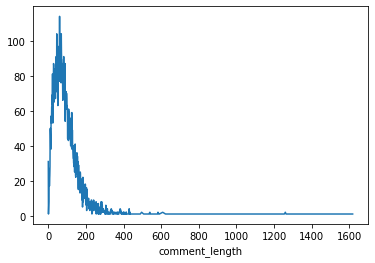

In [22]:
# comments count based on comment length distribution
print("comments count based on comment length distribution")
df1.groupby('comment_length')[0].nunique().plot(kind='line')

In [23]:
To_Process = df1[['cleaned_comment',1]]
To_Process.shape

(10735, 2)

In [24]:
train, test = train_test_split(To_Process, test_size=0.2)

In [25]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Define the sequence lengths, max number of words and embedding dimensions
MAX_SEQUENCE_LENGTH = 300 #can plot a graph for length
MAX_NB_WORDS = 15000
EMBEDDING_DIM = 100

# Get the frequently occurring words
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train.cleaned_comment)
train_sequences = tokenizer.texts_to_sequences(train.cleaned_comment)
test_sequences = tokenizer.texts_to_sequences(test.cleaned_comment)


word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print(train_sequences)

#some padding shit
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
print(train_data)

Found 8602 unique tokens.
[[594, 4726, 188, 283, 1692], [3, 23, 37, 7, 3, 145, 452, 325, 11, 184, 6, 267], [962, 9, 30, 26, 22, 44, 10, 24, 52, 2, 775, 13, 304, 49, 5, 239, 1127, 48, 35], [116, 100, 79, 4, 509, 941, 3, 8, 62, 176, 823, 211, 456, 14, 4, 152, 40, 69, 110, 123, 10], [347, 3, 8, 144, 1906], [18, 211, 2549, 4, 1000, 95, 20, 355, 9, 421, 364, 534, 10, 311, 2, 2550, 894, 100, 33], [80, 189, 17, 3526, 7, 1169, 1038, 18, 1693, 8, 99, 33], [1694, 5, 121, 87, 2934, 230], [1066, 17, 12, 5, 720, 26, 17, 12, 263, 5, 402, 2, 178, 356, 56, 35], [17, 1096, 1, 190, 3, 3527, 19, 2, 406, 535, 21, 330, 23, 37, 140, 1907, 41, 1, 18, 433, 1, 2, 392, 4727, 4728, 1794, 3, 453, 1536], [237, 284, 61, 82], [49, 1169, 13, 4, 62, 169, 1695, 29, 1, 79, 169, 86, 465, 45, 10, 434, 895, 776, 1, 2551, 6, 33], [140, 3, 30, 2, 212, 243, 4, 1039, 7, 21, 321, 29, 10], [70, 70, 5, 97, 1795, 350, 134, 2, 3528, 227, 3529, 1796, 16, 1696, 224, 7, 91, 153, 824, 24, 15, 282, 247, 39, 101, 444, 4, 4729, 1908, 4730

In [26]:
#some shit with labels

from sklearn.preprocessing import LabelEncoder

train_labels = train[1]
test_labels = test[1]

le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)
print(le.classes_)

[-2 -1  0  1  2]


In [29]:
from tensorflow.keras.utils import to_categorical

#change data types (actualy idk why)
labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))
labels_train[11]

array([0., 0., 1., 0., 0.], dtype=float32)

In [31]:
from keras.layers import   Dense, Input, LSTM, Embedding, Dropout, Activation, BatchNormalization, Flatten
import tensorflow as tf
from tensorflow import keras
model2 = keras.Sequential()

#Embedding: batch_size*input_length --> batch_dimension(none)*input_length*output_dim(embbeding_dim)
model2.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model2.add(LSTM(units=40, activation='relu', recurrent_activation='hard_sigmoid',return_sequences=True))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(5,activation='softmax'))

model2.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
model2.fit(train_data, labels_train, batch_size=40, epochs=15, validation_data=(test_data, labels_test))

Epoch 1/15
215/215 [==============================] - 77s 344ms/step - loss: 1.2004 - accuracy: 0.4886 - val_loss: 1.3136 - val_accuracy: 0.3987
Epoch 2/15
215/215 [==============================] - 68s 316ms/step - loss: 0.8155 - accuracy: 0.6882 - val_loss: 1.1426 - val_accuracy: 0.5757
Epoch 3/15
215/215 [==============================] - 66s 309ms/step - loss: 0.5383 - accuracy: 0.8078 - val_loss: 0.9980 - val_accuracy: 0.6190
Epoch 4/15
215/215 [==============================] - 65s 301ms/step - loss: 0.3596 - accuracy: 0.8777 - val_loss: 1.3114 - val_accuracy: 0.6083
Epoch 5/15
215/215 [==============================] - 65s 303ms/step - loss: 0.2769 - accuracy: 0.9089 - val_loss: 1.5604 - val_accuracy: 0.5920
Epoch 6/15
215/215 [==============================] - 62s 288ms/step - loss: 0.2248 - accuracy: 0.9293 - val_loss: 1.7311 - val_accuracy: 0.5971
Epoch 7/15
215/215 [==============================] - 62s 287ms/step - loss: 0.1784 - accuracy: 0.9432 - val_loss: 1.9599 - val_ac

In [32]:
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score

predicted=model2.predict(test_data)
predicted

precision, recall, fscore, support = score(labels_test, predicted.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(labels_test, predicted.round()))

precision: [0.         0.43684211 0.66402715 0.52083333 0.60909091]
recall: [0.         0.37387387 0.71151515 0.50872093 0.51804124]
fscore: [0.         0.40291262 0.68695143 0.51470588 0.55988858]
support: [ 24 222 825 688 388]
############################
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.44      0.37      0.40       222
           2       0.66      0.71      0.69       825
           3       0.52      0.51      0.51       688
           4       0.61      0.52      0.56       388

   micro avg       0.58      0.57      0.58      2147
   macro avg       0.45      0.42      0.43      2147
weighted avg       0.58      0.57      0.57      2147
 samples avg       0.57      0.57      0.57      2147



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
#example
k = 1000
print(test.iloc[k])
x = model2(test_data[k:k+1,:])
x

cleaned_comment    در قسمت جلویی این دستگاه صفحه نمایش ۱۰٫۱ اینچی...
1                                                                  0
Name: 7711, dtype: object


<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[2.1252633e-04, 3.7148092e-03, 9.9500579e-01, 4.7724755e-04,
        5.8960204e-04]], dtype=float32)>